# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 11

**Feb 26, 11:59pm: See the [Calendar](https://github.com/UBC-CS/cpsc330-2023W2/tree/main?tab=readme-ov-file#deliverable-due-dates-tentative).**

## Submission instructions <a name="si"></a>
<hr>

_points: 4_

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **You may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4.
    - You can choose your own group members. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- Be sure to follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023W2/blob/main/docs/homework_instructions.md).

## Imports

In [32]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours". Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>

_points: 3_

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

The dataset consists of various features:
1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
3. Demographic features: Sex, education, marriage and age
4. PAY_i: Repayment status in month i, for 6 months from April to Sept 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
5. BILL_AMTi: Amount of bill statement in month i, for the 6 months (NT dollar)
6. PAY_AMTi: Amount of previous payment in month i, for the 6 months (NT dollar)
7. default.payment.next.month: Default payment (1=yes, 0=no), our target feature

The aim is to predict whether the client will default on payment on the next month, using the data on demographics and past credit card activity and the amount of given credit. 

One concern is whether to use all demographic features, in particular Sex, as the usage of that feature might lead to sex biases (sexism).

<div class="alert alert-warning">
    
Solution_1
    
</div>

In [33]:
df = pd.read_csv("./data/UCI_Credit_Card.csv", index_col=0)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   30000 no

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>

_points: 2_

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=76`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

In [35]:
X = df.drop(columns=["default.payment.next.month"])
y = df["default.payment.next.month"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=76)

X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
8959,340000.0,1,1,2,44,0,0,0,0,0,...,73950.0,59324.0,156094.0,110234.0,20000.0,5000.0,2000.0,112000.0,4234.0,4000.0
22753,200000.0,2,2,2,34,0,0,0,-1,-1,...,3455.0,1078.0,1598.0,171700.0,5504.0,1526.0,1078.0,1598.0,173026.0,6000.0
25883,80000.0,2,2,1,26,0,0,0,0,0,...,74349.0,75443.0,57735.0,58139.0,2800.0,2800.0,2400.0,2100.0,2100.0,2100.0
12926,80000.0,2,2,1,45,0,0,0,0,0,...,80966.0,79295.0,81142.0,80672.0,3130.0,3107.0,2847.0,3134.0,3072.0,3010.0
23599,80000.0,2,2,1,40,-1,-1,-1,-1,-1,...,32194.0,1729.0,590.0,9628.0,2035.0,32194.0,1729.0,590.0,9628.0,16059.0


In [36]:
X_test.shape

(9000, 23)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>

_points: 10_

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

In [37]:
y_train.value_counts()

default.payment.next.month
0    16341
1     4659
Name: count, dtype: int64

There is class inbalance, more payers than defaulters.

In [38]:
# defaulters
df[df['default.payment.next.month'] == 1].describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,...,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.0
mean,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,0.167872,...,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068,1.0
std,115378.540571,0.495520,0.728096,0.525433,9.693438,1.383252,1.502243,1.499401,1.508535,1.482833,...,64351.076092,61424.695949,59579.674268,9544.252427,11737.986064,12959.624486,11191.973162,11944.731175,13464.005894,0.0
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-65167.000000,-53007.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,...,2141.500000,1502.750000,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,90000.000000,2.000000,2.000000,2.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,19119.500000,18478.500000,18028.500000,1636.000000,1533.500000,1222.000000,1000.000000,1000.000000,1000.000000,1.0
75%,200000.000000,2.000000,2.000000,2.000000,42.000000,2.000000,2.000000,2.000000,2.000000,0.000000,...,50175.750000,47853.000000,47424.000000,3478.250000,3309.750000,3000.000000,2939.250000,3000.000000,2974.500000,1.0
max,740000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,548020.000000,547880.000000,514975.000000,300000.000000,358689.000000,508229.000000,432130.000000,332000.000000,345293.000000,1.0


In [39]:

# responsible payers
df[df['default.payment.next.month'] == 0].describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,...,23364.000000,23364.000000,23364.000000,23364.000000,2.336400e+04,23364.000000,23364.000000,23364.000000,23364.000000,23364.0
mean,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,...,43611.165254,40530.445343,39042.268704,6307.337357,6.640465e+03,5753.496833,5300.529319,5248.220296,5719.371769,0.0
std,131628.359660,0.486806,0.806780,0.520794,9.077355,0.952464,1.035191,1.048378,1.013162,0.977591,...,64324.796730,60617.268112,59547.015717,18014.508990,2.530226e+04,18684.255937,16689.778060,16071.667860,18792.950473,0.0
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
25%,70000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2360.000000,1823.000000,1265.500000,1163.750000,1.005000e+03,600.000000,390.000000,369.000000,300.000000,0.0
50%,150000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19000.000000,17998.000000,16679.000000,2459.500000,2.247500e+03,2000.000000,1734.000000,1765.000000,1706.000000,0.0
75%,250000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55988.000000,51135.250000,49842.500000,5606.250000,5.311250e+03,5000.000000,4602.000000,4600.000000,4545.000000,0.0
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,7.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,0.0


Comparing the statistics from both payers and defaulters, we can understand which transformations to apply to each row. 

### Box plots

C:\Users\joshu\miniconda3\envs\cpsc330\lib\site-packages\pandas\plotting\_matplotlib\tools.py:225: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)


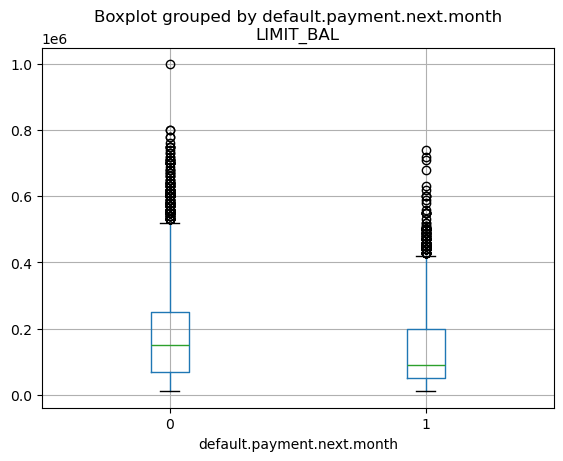

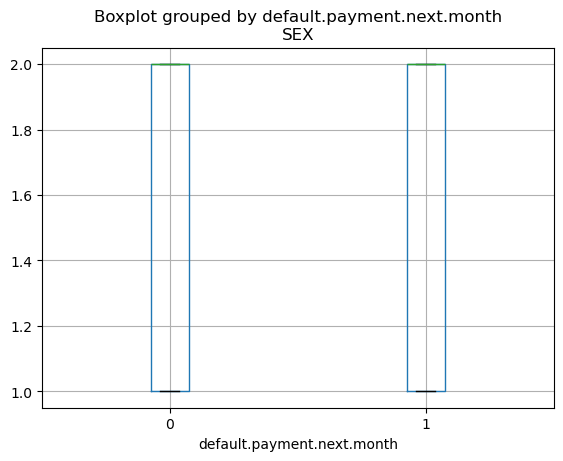

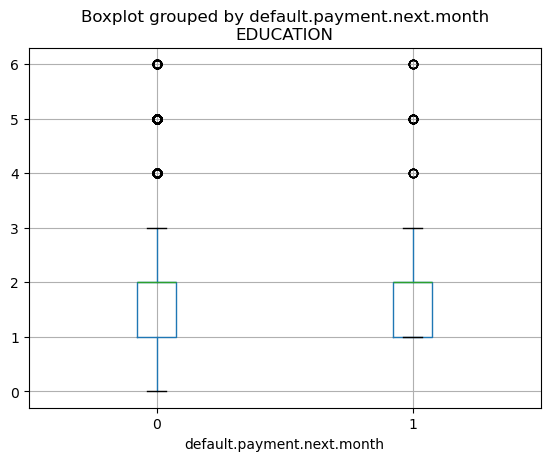

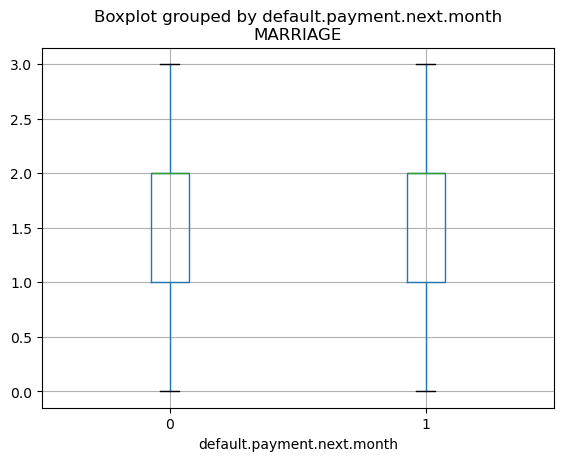

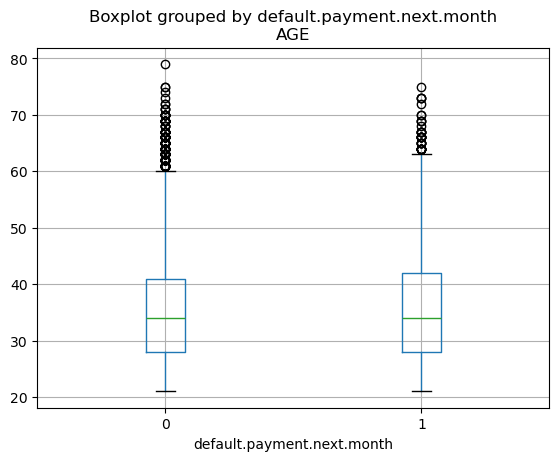

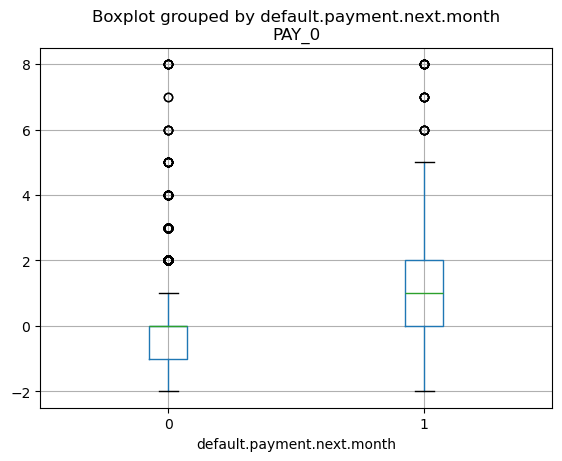

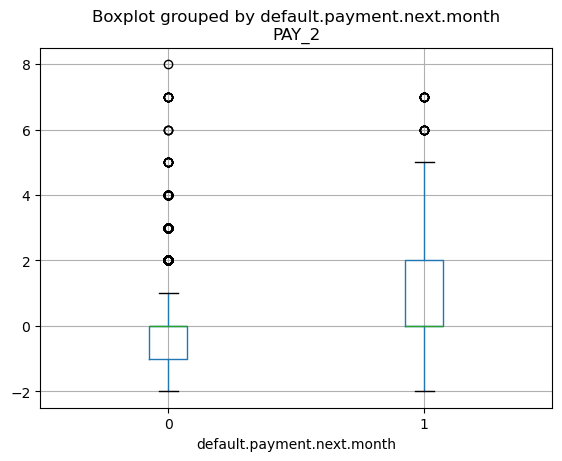

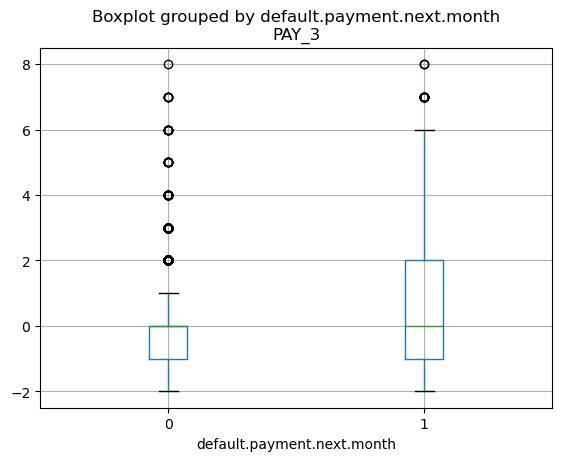

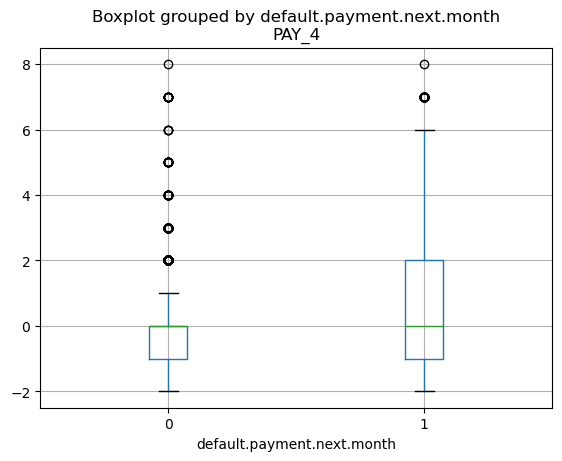

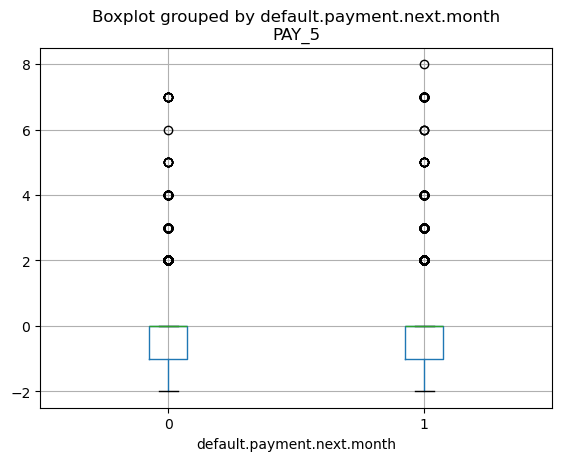

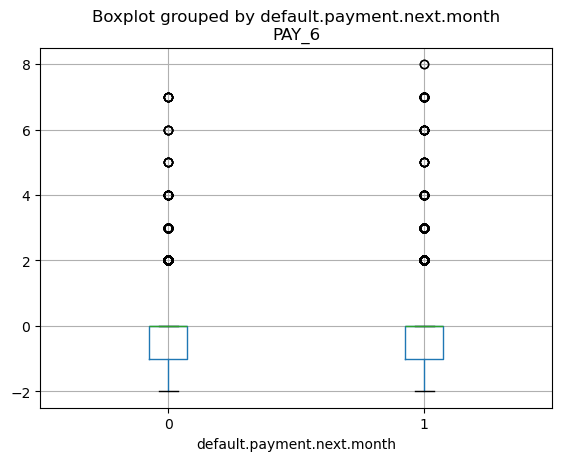

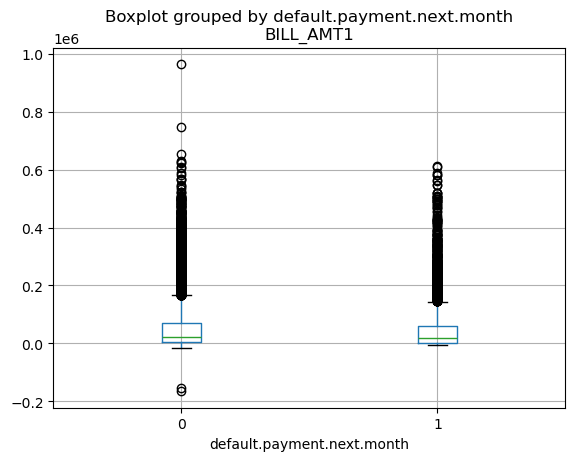

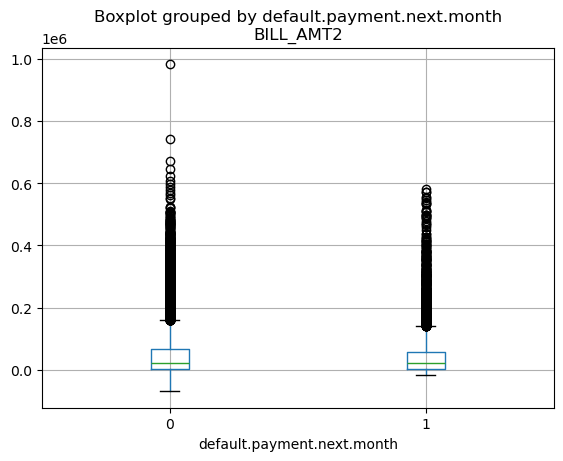

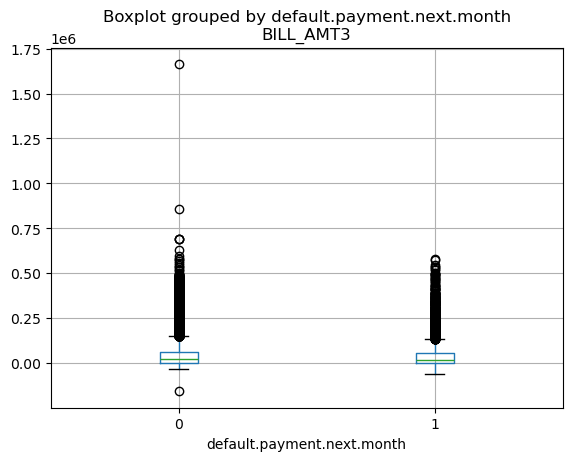

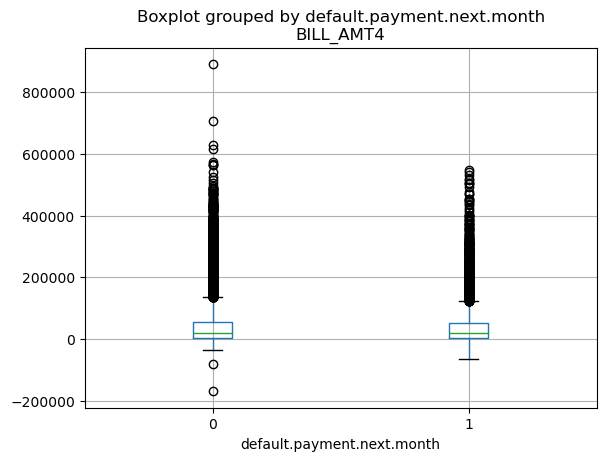

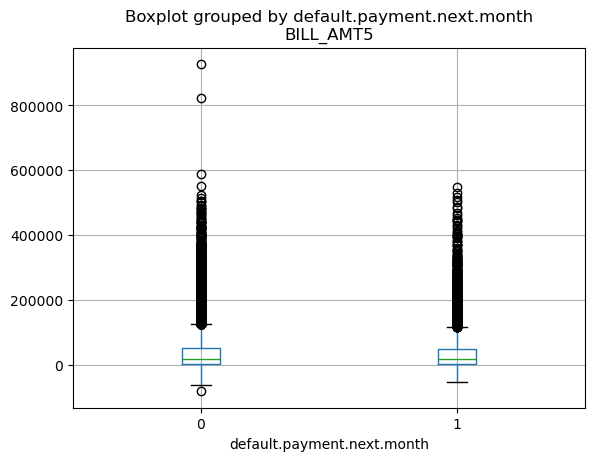

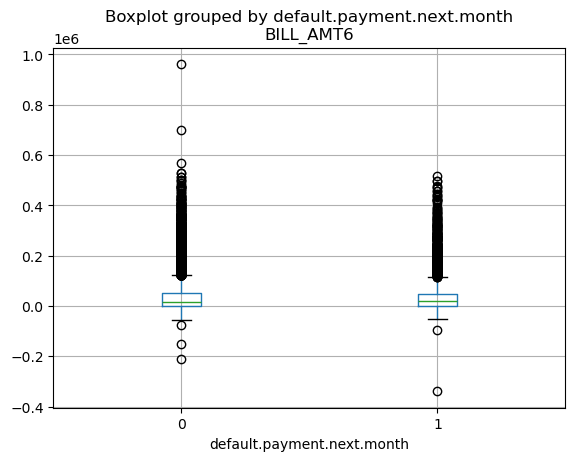

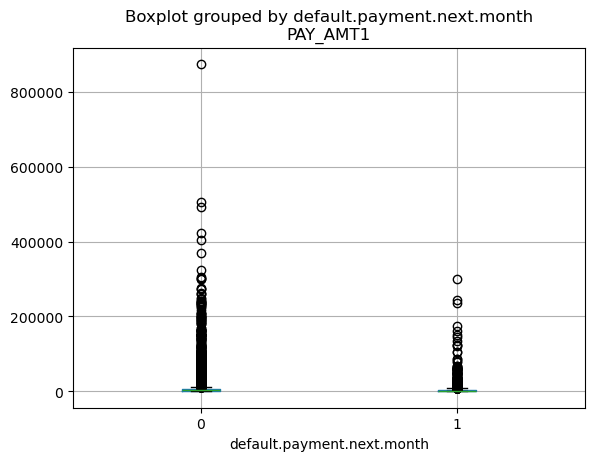

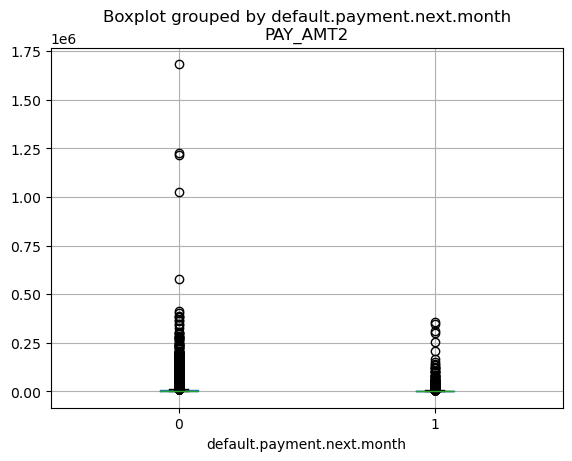

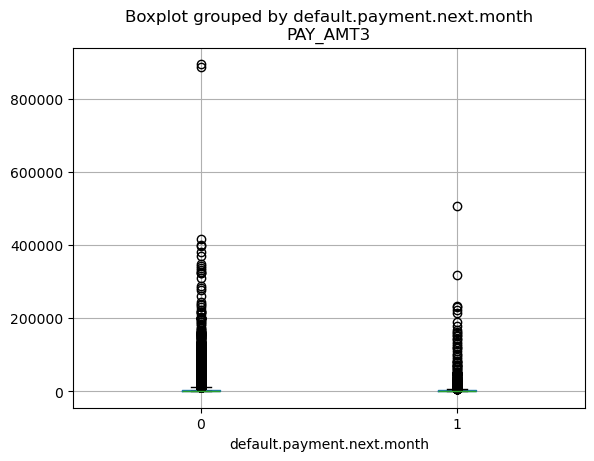

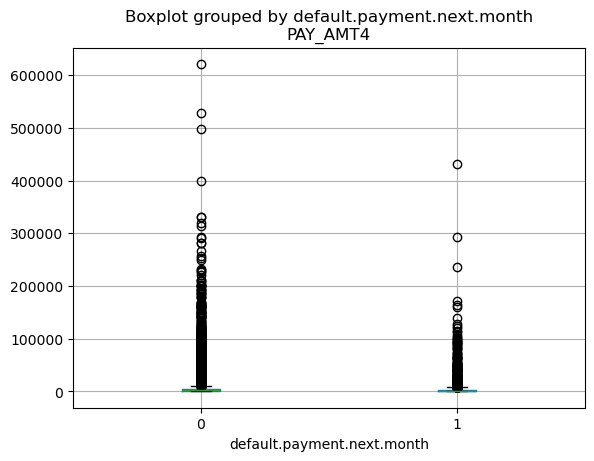

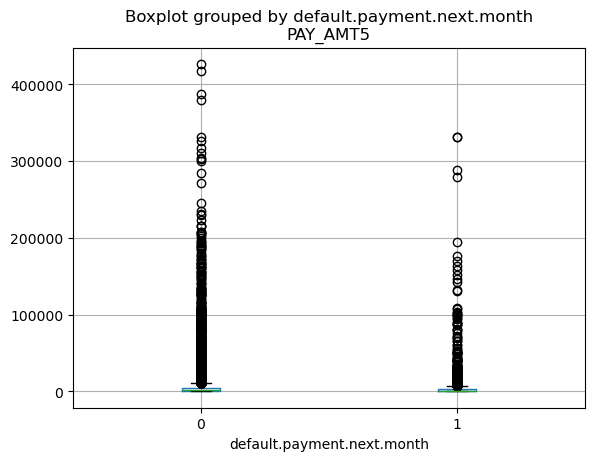

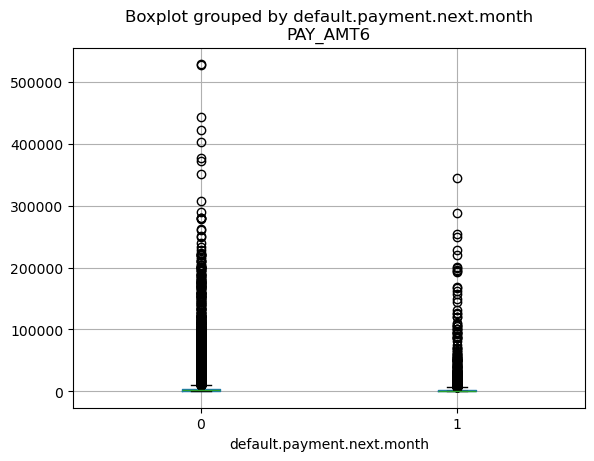

In [40]:

for feature in X_train.columns:
    df.boxplot(column=feature, by='default.payment.next.month')

Figure 1: Boxplot grouped by payment.default.next.month - PAY0, if the person has delayed payments, they are more likely to default on the next month. 


Figure 2: Boxplot grouped by payment.default.next.month - LIMIT_BAL, if the person has a lower credit given, they are more likely to default on the next month. 

### Analysis 

From the data exploration, we can see that some features have a higher correlation with the target feature. For example, from the box plots and descriptions above, clients that default are more likely to have delayed their payments for the past 6 months, and have made smaller payments. However, other features such as sex and marriage do not seem to have much correlation with the target, and can be excluded. 

#### Metric for assessment

Due to class imbalance (we have 16341 instances of payers, and 4659 instances of defaulters), we would use **f1-score**. 

We will use **macro average** because both classes are important. If we have too many false positives (predict defaulter on a payer), we will lose money. If we have too many false negatives (predict payer on a defaulter), we will be seen as a bank that does not provide enough credit limit. However, we generally would prefer false negatives over false positives. 

In [41]:
scoring_metric="f1_macro"

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Preprocessing and transformations <a name="5"></a>
<hr>

_points: 10_

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

In [42]:
df = df[df["MARRIAGE"]!= 0]

| Feature | Transformation | Explanation
| --- | ----------- | ----- |
| LIMIT_BAL	 | scaling |  A numeric feature |
| SEX | drop | We would not like our model to possibly have gender bias |
| EDUCATION | one-hot-encoding | There are 2 possible values for other (5 and 6), which cannot be arranged in a meaningful way. Thus, we use one-hot-encoding. |
| MARRIAGE | one-hot-encoding| Cannot be arranged in a meaningful way. |
| AGE | scaling | Numeric feature. |
| PAY_0-PAY_6 | ordinal encoding | The data is numeric and has a meaning for the values 1 to 9. Presumably, there is a meaningful difference between -1 and -2 values, perhaps -2 means the payer paid before it was due. |
| BILL_AMT1 - BILL_AMT6 | scaling  | Numeric feature. |
| PAY_AMT1-PAY_AMT6 | scaling  | Numeric feature. |


In [43]:
numeric_features = [
    'LIMIT_BAL',
    'AGE',
    'BILL_AMT1',
    'BILL_AMT2',
    'BILL_AMT3',
    'BILL_AMT4',
    'BILL_AMT5',
    'BILL_AMT6',
    'PAY_AMT1',
    'PAY_AMT2',
    'PAY_AMT3',
    'PAY_AMT4',
    'PAY_AMT5',
    'PAY_AMT6',
]
categorical_features = [
    'EDUCATION',
    'MARRIAGE'
]
ordinal_features = [
    'PAY_0',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6',
]
drop_features = [
    'SEX'
]

In [44]:
# ordered_pay: array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)
ordered_pay = X["PAY_0"].unique()

ordered_pay.sort()
ordered_pay

array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

In [45]:
ct = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features),
    (OrdinalEncoder(categories=[ordered_pay]*len(ordinal_features), dtype=int), ordinal_features),
    ("drop", drop_features)
)
ct

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['EDUCATION', 'MARRIAGE']),
                                ('ordinalencoder',
                                 Ordi...2,  3,  4,  5,  6,  7,  8], dtype=int64),
                                                            array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64),
                                                            array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64),
                                                            array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64),
                                                            array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64),
                                                            array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)],
                                                dtype=<class 'int'>),
                                 ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                  'PAY_6']),
                                ('drop', 'drop', ['SEX'])])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Baseline model <a name="6"></a>
<hr>

_points: 2_

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_5
    
</div>

In [46]:
results = {}

# create a function that returns the model 
def test_model(model):
    """Create a function that makes a pipeline with a model and gets the mean cv train and test scores. Takes in a model and parameters of the model. Returns a tuple (test score, training score).

    Parameters:
    model (int): Must be a scikit learn model

    Returns:
    <class 'tuple'>: (test score, training score)

   """
    pipe = make_pipeline(ct, model)
    scores = cross_validate(pipe, X, y, cv=5, return_train_score=True, scoring=scoring_metric)
    
    mean_test_score = np.mean(scores['test_score'])
    mean_train_score = np.mean(scores['train_score'])
    mean_fit_time = np.mean(scores['fit_time'])
    mean_score_time = np.mean(scores['score_time'])
    
    # Store the mean scores and times in the results dictionary
    results[type(model).__name__] = {
        'mean_test_score': mean_test_score,
        'mean_train_score': mean_train_score,
        'mean_fit_time': mean_fit_time,
        'mean_score_time': mean_score_time
    }
    
    return mean_test_score, mean_train_score, mean_fit_time, mean_score_time


In [47]:
test_model(DummyClassifier())

(0.4378232508406154,
 0.4378232515809599,
 0.059328126907348636,
 0.021335792541503907)

In [48]:
pd.DataFrame(results)

results_df = pd.DataFrame(results).T  # Transpose to get models as rows
results_df

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score
DummyClassifier,0.059328,0.021336,0.437823,0.437823


The DummyClassifier model has a train score of 0.779 and a test score of 0.779. 

<br><br>

<!-- BEGIN QUESTION -->

## 6. Linear models <a name="7"></a>
<hr>

_points 10_

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

In [49]:
param_grid = {
    "C": [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1, 3, 5, 10, 30, 50, 100]
}

results_dict = {"C": [], "mean_cv_score": [], "std_cv_score": []}

for C in param_grid["C"]:
    pipe = make_pipeline(ct, LogisticRegression(max_iter=1000, C=C))
    scores = cross_val_score(pipe, X_train, y_train)  # perform cross-validation
    mean_score = np.mean(scores)  # compute mean cross-validation accuracy
    std_score = np.std(scores)
    
    results_dict["C"].append(C)
    results_dict["mean_cv_score"].append(mean_score)
    results_dict["std_cv_score"].append(std_score)

In [50]:
pd.DataFrame(results_dict)

,C,mean_cv_score,std_cv_score
0,0.001,0.800238,0.005921
1,0.010,0.808524,0.004391
2,0.100,0.810238,0.004309
3,0.300,0.810762,0.004196
4,0.500,0.810810,0.004226
5,0.700,0.810762,0.004226
6,0.900,0.810762,0.004226
7,1.000,0.810714,0.004146
8,3.000,0.810619,0.004131
9,5.000,0.810619,0.004131


The best C hyperparameter value is 0.5 as it has the highest CV value, although it has slightly higher standard deviation than C = 0.3. 

<!-- BEGIN QUESTION -->

## 7. Different models <a name="8"></a>
<hr>

_points: 12_

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_7
    
</div>

In [51]:
test_model(RandomForestClassifier())

(0.6799270849655529,
 0.9984634076018551,
 20.278547048568726,
 0.2317203998565674)

In [52]:
test_model(KNeighborsClassifier())

(0.6533600004811453,
 0.7401678347303491,
 0.10405430793762208,
 0.33010034561157225)

In [53]:
test_model(SVC())

(0.6728959835791264, 0.6787465696599735, 40.96927495002747, 10.75331382751465)

In [54]:
results_df = pd.DataFrame(results).T  # Transpose to get models as rows
results_df

,mean_test_score,mean_train_score,mean_fit_time,mean_score_time
DummyClassifier,0.437823,0.437823,0.059328,0.021336
RandomForestClassifier,0.679927,0.998463,20.278547,0.231720
KNeighborsClassifier,0.653360,0.740168,0.104054,0.330100
SVC,0.672896,0.678747,40.969275,10.753314


<!-- BEGIN QUESTION -->

## 8. Hyperparameter optimization <a name="10"></a>
<hr>

_points: 10_

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_8
    
</div>

### Random Forest Classifier

In [55]:
rf = RandomForestClassifier()

param_grid = {
    "randomforestclassifier__n_estimators": np.arange(1, 9, 2),
    "randomforestclassifier__max_depth": np.int64(10**np.arange(0,3,1)), 
    "randomforestclassifier__min_samples_split": np.arange(2, 12, 4),
    "randomforestclassifier__min_samples_leaf": np.arange(1, 5, 2),
} 

pipe = make_pipeline(ct, rf)

grid_search = GridSearchCV(pipe, param_grid, n_jobs = -1, return_train_score=True, scoring=scoring_metric)
grid_search.fit(X_train, y_train)
best_n_estimators = grid_search.best_params_["randomforestclassifier__n_estimators"]
best_max_depth = grid_search.best_params_["randomforestclassifier__max_depth"]
best_min_samples_split = grid_search.best_params_["randomforestclassifier__min_samples_split"]
best_min_samples_leaf = grid_search.best_params_["randomforestclassifier__min_samples_leaf"]
best_score = grid_search.best_score_

best_n_estimators, best_max_depth, best_min_samples_split, best_min_samples_leaf, best_score

(7, 10, 2, 3, 0.6735641293025052)

For random forest classifier, the best max_depth is 10, and the best n_estimators is 7. This produces a best_score of 0.816.

### k Nearest Classifier

In [56]:
knn = KNeighborsClassifier()

param_grid = {
    "kneighborsclassifier__n_neighbors": np.int64(10**np.arange(1, 3, 0.5))
} 

pipe = make_pipeline(ct, knn)

grid_search = GridSearchCV(pipe, param_grid, n_jobs = -1, return_train_score=True, scoring=scoring_metric)
grid_search.fit(X_train, y_train)
grid_search.best_params_["kneighborsclassifier__n_neighbors"], grid_search.best_score_


(31, 0.6700947895715629)

For K Neighbors Classifier, the best n_neighbors value is 100, and produces a score of 0.778.

### Results from trying 2 models

In [57]:
rf_best = RandomForestClassifier(
    n_estimators=best_n_estimators, 
    max_depth=best_max_depth, 
    min_samples_leaf=best_min_samples_leaf, 
    min_samples_split=best_min_samples_split
)
knn_best = KNeighborsClassifier(n_neighbors = 100)

test_model(rf_best)
test_model(knn_best)

(0.6595727500341703,
 0.6636412318772338,
 0.032997941970825194,
 0.33513641357421875)

In [58]:
results_df = pd.DataFrame(results).T  # Transpose to get models as rows
results_df

,mean_test_score,mean_train_score,mean_fit_time,mean_score_time
DummyClassifier,0.437823,0.437823,0.059328,0.021336
RandomForestClassifier,0.668830,0.724453,0.397911,0.017114
KNeighborsClassifier,0.659573,0.663641,0.032998,0.335136
SVC,0.672896,0.678747,40.969275,10.753314


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Results on the test set <a name="12"></a>
<hr>

_points: 10_

**Your tasks:**

1. Try your best performing model on the test data: report and explain test scores.
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias?

<div class="alert alert-warning">
    
Solution_9
    
</div>

In [59]:
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)
rf_best.score(X_test, y_test), f1_score(y_test, y_pred, average="macro")

(0.8205555555555556, 0.6781146603192841)

The test score for the best performing RF model is 0.821. 

I trust my results because we followed the golden rule, by separating the test and training set when we do transformations and validation. The model is less likely to overfit and suffer from optimization bias because we are training with multiple trees that are independent of each other, using different bootstrapped samples of the data. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Summary of results <a name="13"></a>
<hr>

_points 12_

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table (printed `DataFrame`) summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_10
    
</div>

In [60]:
results_df = pd.DataFrame(results).T 
results_df

,mean_test_score,mean_train_score,mean_fit_time,mean_score_time
DummyClassifier,0.437823,0.437823,0.059328,0.021336
RandomForestClassifier,0.668830,0.724453,0.397911,0.017114
KNeighborsClassifier,0.659573,0.663641,0.032998,0.335136
SVC,0.672896,0.678747,40.969275,10.753314


In conclusion, the Random Forest Classifier produces a very high f1-score relative to other models and with a relatively low fit and score time. This makes it the ideal model to use for predicting credit card defaulters. 

One additional idea to improve the model would be using gradient boosting, where we combine many shallow decision trees where each subsequent tree makes continuous predictions that "fixes" the mistakes of the previous. In general, gradient boosting is shown to have better scores and faster fitting times than all of our previous models. Another idea for improvement is stacking, which takes the output of one model and uses it as the input of another to create a stronger and more robust model. This also yields higher accuracy, and we can see hte coefficient of each base classifier. 

Our final test score is 0.821. Our final f1-score is 0.669 (nice). The f1 score is moderate, which means our model achieved a reasonable balance between precision and recall, but there is room for improvement.


<!-- END QUESTION -->

<br><br>

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using [PrairieLearn](https://ca.prairielearn.com/pl/course_instance/6697). Don't forget to rename your file `hw4_sol.ipynb`.

This was a tricky one but you did it!

![](img/eva-well-done.png)